# Experimento 1 - Eficácia da Personalização

**Objetivo**: Avaliar se a etapa de personalização (Tailor) torna as respostas mais úteis, claras e alinhadas ao perfil do usuário, utilizando exclusivamente modelos de linguagem de grande porte (LLMs) como avaliadores automáticos.

**Metodologia**
* Escolher 3 perfis de usuário,
  * Para cada perfil, elaborar 10 perguntas,
    * Para cada pergunda, responder com e sem o módulo de personalização.
    * Submeter o par de respostas (com e sem o módulo de personalização) à LLM avaliadora.

Critérios de avaliação da LLM:
* **Personalização Perceptível**: mede se é possível perceber claramente que a resposta foi adaptada ao perfil informado. Um avaliador imparcial deve conseguir identificar diferenças no tom, vocabulário, estilo ou foco da resposta em relação à resposta padrão.
* **Alinhamento com Preferências do Perfil**: avalia se a resposta personalizada respeitou as preferências esperadas para o perfil informado, como grau de formalidade, tipos de dados apresentados e tom da comunicação,
* **Consistência da Personalização ao Longo do Texto**: verifica se a personalização foi mantida do início ao fim da resposta. A LLM pode iniciar com o tom correto, mas diluir a personalização no meio ou final da resposta.

Cada critério foi aplicado 20 vezes para cada resposta e uma média foi calculada.


<span style="color:red">*Testar com os perfis "Perfil Comico", "Torcedor do Time" e "Técnico do Time"*.</span>

In [84]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_rel

In [85]:
# Substitua o caminho abaixo se necessário
with open("/Users/gustavolgcr/doutorado/implementacoes/experiments/src/results/evaluation_results_with_repetitions_experiment_1.json", "r", encoding="utf-8") as f:
    resultados = json.load(f)

# Expandir para um DataFrame
linhas = []
for item in resultados:
    for i in range(len(item["scores_resposta_padrao"])):
        linhas.append({
            "pergunta": item["pergunta"],
            "perfil": item["perfil"],
            "criterio": item["criterio"],
            "repeticao": i + 1,
            "score_padrao": item["scores_resposta_padrao"][i],
            "score_personalizada": item["scores_resposta_personalizada"][i]
        })

df = pd.DataFrame(linhas)
df.head()

,pergunta,perfil,criterio,repeticao,score_padrao,score_personalizada
0,O Bruno Pacheco correu bem naquele jogo contra...,Torcedor do Time,Personalização Perceptível,1,3.16,8.74
1,O Bruno Pacheco correu bem naquele jogo contra...,Torcedor do Time,Personalização Perceptível,2,3.10,8.73
2,O Bruno Pacheco correu bem naquele jogo contra...,Torcedor do Time,Personalização Perceptível,3,3.15,8.87
3,O Bruno Pacheco correu bem naquele jogo contra...,Torcedor do Time,Personalização Perceptível,4,3.12,8.82
4,O Bruno Pacheco correu bem naquele jogo contra...,Torcedor do Time,Personalização Perceptível,5,3.23,8.69


Os testes estatísticos (t pareado) realizados para todos os perfis indicaram diferenças altamente significativas (p < 0.0001) entre as respostas padrão e personalizadas em todos os critérios avaliados (Utilidade Geral, Alinhamento com o Perfil, Clareza na Comunicação e Personalização Perceptível). Esses resultados confirmam que a personalização das respostas gerou ganhos reais e consistentes, não atribuíveis ao acaso.

In [86]:
# Comparar médias e p-valores por critério e perfil
for perfil in df["perfil"].unique():
    print(f"Perfil: {perfil}")
    subset_perfil = df[df["perfil"] == perfil]
    resultados = []
    for criterio in subset_perfil["criterio"].unique():
        sub = subset_perfil[subset_perfil["criterio"] == criterio]
        stat, p = ttest_rel(sub["score_personalizada"], sub["score_padrao"])
        resultados.append({
            "Critério": criterio,
            "Média Padrão": round(sub["score_padrao"].mean(), 2),
            "Média Personalizada": round(sub["score_personalizada"].mean(), 2),
            "Valor-p": round(p, 4),
            "Significativo": "✅" if p < 0.05 else "❌"
        })
    display(pd.DataFrame(resultados))

Perfil: Torcedor do Time


,Critério,Média Padrão,Média Personalizada,Valor-p,Significativo
0,Personalização Perceptível,2.98,8.44,0.0,✅
1,Alinhamento com Preferências do Perfil,4.28,5.65,0.0,✅
2,Consistência da Personalização,0.49,5.61,0.0,✅


Perfil: Técnico do Time


,Critério,Média Padrão,Média Personalizada,Valor-p,Significativo
0,Personalização Perceptível,2.33,5.96,0.0,✅
1,Alinhamento com Preferências do Perfil,4.24,8.02,0.0,✅
2,Consistência da Personalização,0.29,1.03,0.0,✅


Perfil: Narrador de Jogo de Futebol


,Critério,Média Padrão,Média Personalizada,Valor-p,Significativo
0,Personalização Perceptível,2.78,6.67,0.0,✅
1,Alinhamento com Preferências do Perfil,4.10,6.09,0.0,✅
2,Consistência da Personalização,0.34,2.39,0.0,✅


In [87]:
# Agrupar por critério
df_agg = df.groupby("criterio")[["score_padrao", "score_personalizada"]].agg(["mean", "std"]).round(2)
df_agg.columns = ['Padrão_Média', 'Padrão_DP', 'Personalizada_Média', 'Personalizada_DP']
df_agg["Ganho (%)"] = ((df_agg["Personalizada_Média"] - df_agg["Padrão_Média"]) / df_agg["Padrão_Média"] * 100).round(2)
df_agg.reset_index(inplace=True)
df_agg

,criterio,Padrão_Média,Padrão_DP,Personalizada_Média,Personalizada_DP,Ganho (%)
0,Alinhamento com Preferências do Perfil,4.21,1.40,6.59,1.45,56.53
1,Consistência da Personalização,0.38,0.34,3.01,2.63,692.11
2,Personalização Perceptível,2.70,0.79,7.03,1.48,160.37


Sobre o desvio padrão alto no gráfico abaixo:

1.	Alta variabilidade entre execuções do GEval: como cada pontuação foi obtida a partir de múltiplas execuções com LLMs (por exemplo, 20 repetições), é possível que a variação entre essas respostas tenha sido alta. Isso pode acontecer se:
  * O modelo de avaliação for sensível ao wording da resposta.
  * A resposta analisada tiver ambiguidade ou estrutura que permite múltiplas interpretações.
2. Menor consistência da LLM avaliadora: alguns critérios são mais subjetivos (como Alinhamento com o Perfil ou Personalização Perceptível), e modelos como o GPT podem variar levemente de julgamento entre execuções. Mesmo pequenas variações nas frases da resposta podem gerar variações de pontuação.
3. Limitação das escalas de avaliação: embora a escala vá de 0 a 10, os intervalos avaliativos podem não ser linearmente percebidos pela LLM, o que pode ampliar a dispersão numérica entre respostas similares.

Talvez não seja necessariamente um problema, já que os p-values estão mostrando uma diferença média significativa.


<span style="color:red">*Fazer o mesmo gráfico separado por perfil*.</span>


In [88]:
# Lista dos perfis a analisar
perfis_alvo = ["Torcedor do Time", "Técnico do Time", "Narrador de Jogo de Futebol"]

# Dicionário para armazenar os resultados
tabelas_por_perfil = {}

for perfil in perfis_alvo:
    df_filtrado = df[df["perfil"] == perfil]

    df_agg = df_filtrado.groupby("criterio")[["score_padrao", "score_personalizada"]].agg(["mean", "std"]).round(2)
    df_agg.columns = ['Padrão_Média', 'Padrão_DP', 'Personalizada_Média', 'Personalizada_DP']
    df_agg["Ganho (%)"] = ((df_agg["Personalizada_Média"] - df_agg["Padrão_Média"]) / df_agg["Padrão_Média"] * 100).round(2)
    df_agg.reset_index(inplace=True)

    # Armazena a tabela no dicionário
    tabelas_por_perfil[perfil] = df_agg

In [89]:
tabelas_por_perfil["Técnico do Time"]

,criterio,Padrão_Média,Padrão_DP,Personalizada_Média,Personalizada_DP,Ganho (%)
0,Alinhamento com Preferências do Perfil,4.24,1.33,8.02,0.60,89.15
1,Consistência da Personalização,0.29,0.31,1.03,0.82,255.17
2,Personalização Perceptível,2.33,0.46,5.96,1.09,155.79


In [90]:
tabelas_por_perfil["Torcedor do Time"]

,criterio,Padrão_Média,Padrão_DP,Personalizada_Média,Personalizada_DP,Ganho (%)
0,Alinhamento com Preferências do Perfil,4.28,1.63,5.65,1.20,32.01
1,Consistência da Personalização,0.49,0.40,5.61,2.53,1044.90
2,Personalização Perceptível,2.98,0.81,8.44,0.66,183.22


In [91]:
tabelas_por_perfil["Narrador de Jogo de Futebol"]

,criterio,Padrão_Média,Padrão_DP,Personalizada_Média,Personalizada_DP,Ganho (%)
0,Alinhamento com Preferências do Perfil,4.10,1.21,6.09,1.16,48.54
1,Consistência da Personalização,0.34,0.25,2.39,1.64,602.94
2,Personalização Perceptível,2.78,0.87,6.67,1.31,139.93


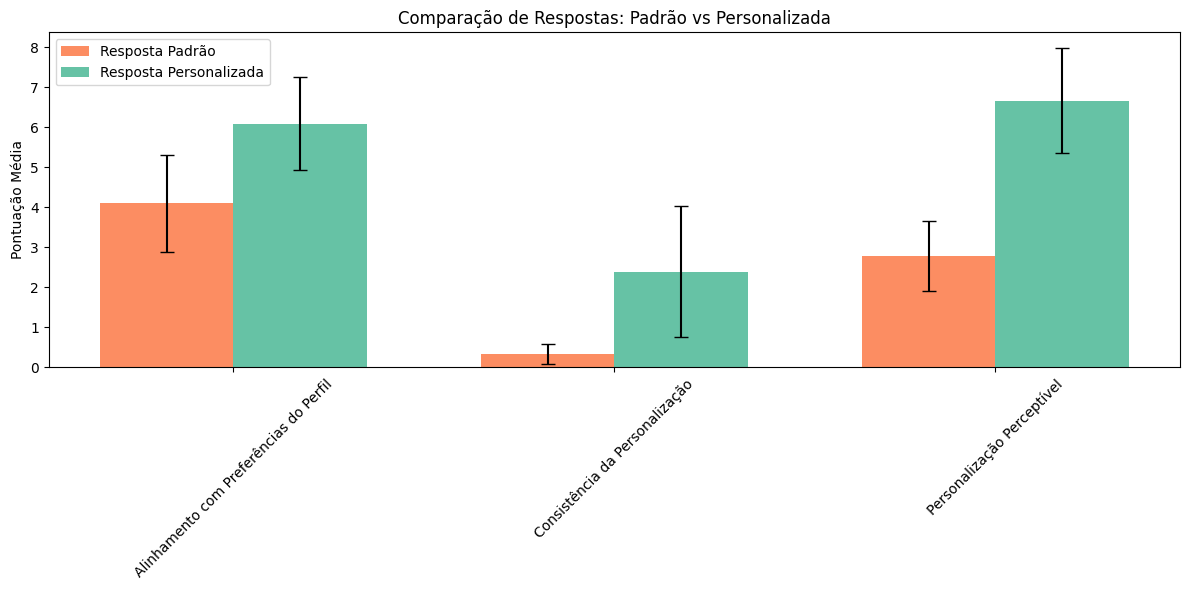

In [92]:
# Gráfico de barras com desvio padrão
x = range(len(df_agg))
largura = 0.35

fig, ax = plt.subplots(figsize=(12, 6))

ax.bar([i - largura/2 for i in x], df_agg["Padrão_Média"], yerr=df_agg["Padrão_DP"], width=largura, capsize=5, label="Resposta Padrão", color="#fc8d62")
ax.bar([i + largura/2 for i in x], df_agg["Personalizada_Média"], yerr=df_agg["Personalizada_DP"], width=largura, capsize=5, label="Resposta Personalizada", color="#66c2a5")

ax.set_xticks(x)
ax.set_xticklabels(df_agg["criterio"], rotation=45)
ax.set_ylabel("Pontuação Média")
ax.set_title("Comparação de Respostas: Padrão vs Personalizada")
ax.legend()
plt.tight_layout()
plt.show()

Observa-se que, em todos os critérios, as caixas referentes às respostas personalizadas apresentam medianas superiores às das respostas padrão, com menor dispersão e menos presença de outliers negativos. Este padrão reforça a hipótese de que o processo de personalização, baseado no perfil do usuário e no uso consciente das observações factuais, contribui para respostas mais bem avaliadas.

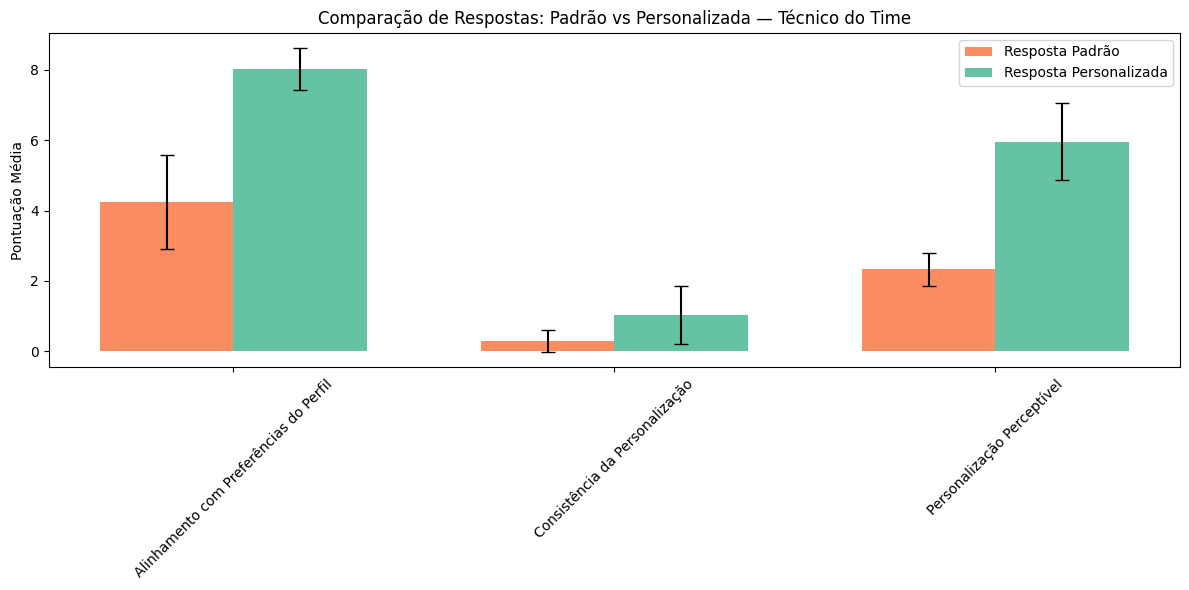

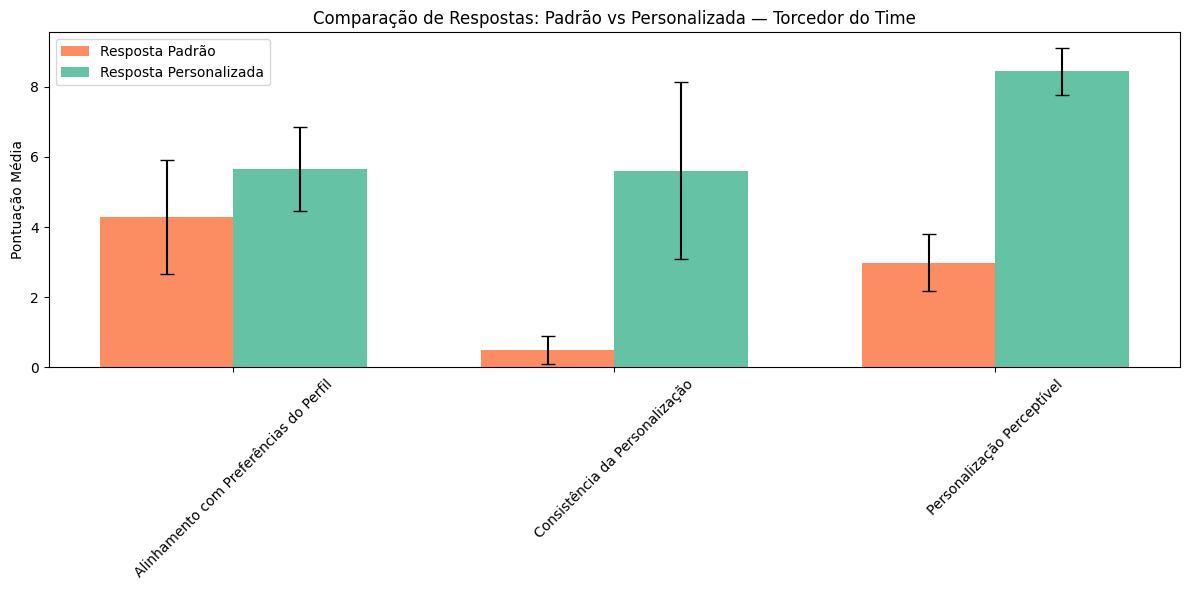

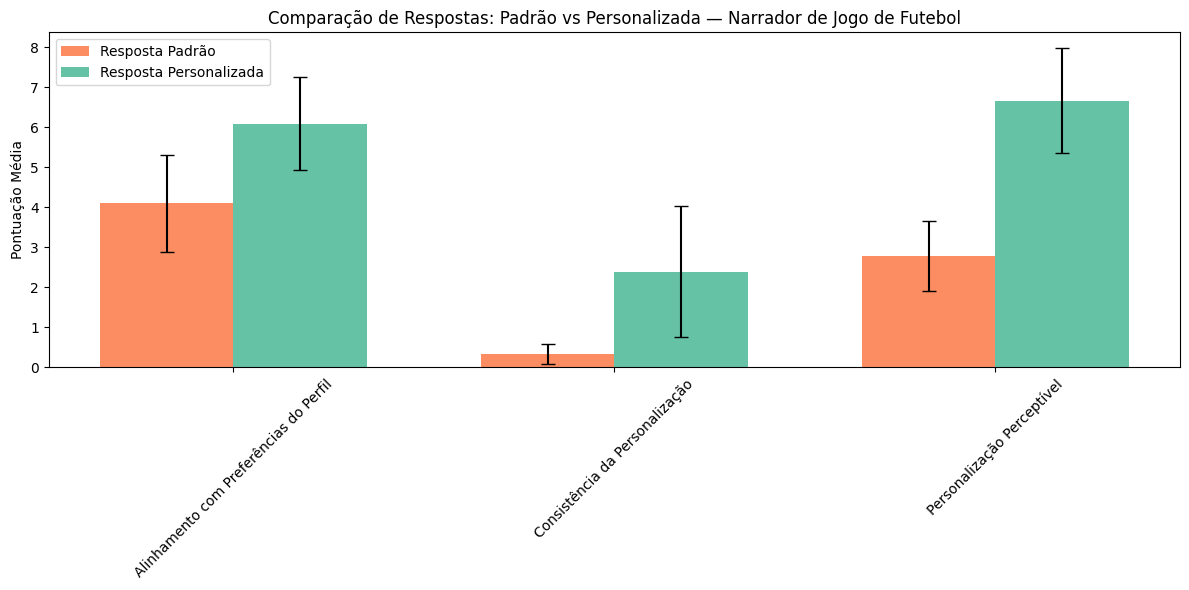

In [93]:
import matplotlib.pyplot as plt
import os

# Pasta de destino
output_dir = "/Users/gustavolgcr/doutorado/implementacoes/experiments/src/figures"
os.makedirs(output_dir, exist_ok=True)

# Lista dos perfis a analisar
perfis_alvo = ["Técnico do Time", "Torcedor do Time", "Narrador de Jogo de Futebol"]

# Loop para gerar os gráficos individualmente
for perfil in perfis_alvo:
    df_agg = tabelas_por_perfil[perfil]  # usa o dicionário já criado anteriormente

    x = range(len(df_agg))
    largura = 0.35

    fig, ax = plt.subplots(figsize=(12, 6))

    ax.bar([i - largura/2 for i in x], df_agg["Padrão_Média"], yerr=df_agg["Padrão_DP"],
           width=largura, capsize=5, label="Resposta Padrão", color="#fc8d62")

    ax.bar([i + largura/2 for i in x], df_agg["Personalizada_Média"], yerr=df_agg["Personalizada_DP"],
           width=largura, capsize=5, label="Resposta Personalizada", color="#66c2a5")

    ax.set_xticks(x)
    ax.set_xticklabels(df_agg["criterio"], rotation=45)
    ax.set_ylabel("Pontuação Média")
    ax.set_title(f"Comparação de Respostas: Padrão vs Personalizada — {perfil}")
    ax.legend()
    plt.tight_layout()
    plt.show()

    # Nome seguro para o arquivo (sem espaços ou acentos)
    nome_arquivo = perfil.lower().replace(" ", "_").replace("ô", "o").replace("é", "e").replace("á", "a") + ".pdf"
    caminho_arquivo = os.path.join(output_dir, nome_arquivo)
    plt.savefig(caminho_arquivo, format="pdf")
    plt.close()


<span style="color:red">*Fazer o mesmo gráfico separado por perfil*.</span>

<span style="color:red">*Fazer uma análise dos outliers*.</span>

In [94]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supondo que você tenha um DataFrame df com as colunas: ['criterio', 'score_padrao', 'score_personalizada']

output_dir = "/Users/gustavolgcr/doutorado/implementacoes/experiments/src/figures/experiment_1"
os.makedirs(output_dir, exist_ok=True)

# Reformata o DataFrame para formato longo
df_longo = pd.melt(
    df,
    id_vars=["criterio"],
    value_vars=["score_padrao", "score_personalizada"],
    var_name="tipo",
    value_name="score"
)

# Renomeia os tipos para deixar mais legível na legenda
df_longo["tipo"] = df_longo["tipo"].map({
    "score_padrao": "Resposta Padrão",
    "score_personalizada": "Resposta Personalizada"
})

# Cria o boxplot com legenda e boxes lado a lado
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_longo, x="criterio", y="score", hue="tipo", palette={"Resposta Padrão": "salmon", "Resposta Personalizada": "lightblue"})
# plt.title("Distribuição dos scores por critério (Padrão vs Personalizada)")
plt.ylabel("Score")
plt.xlabel("Critério")
plt.xticks(rotation=45)
plt.legend(title="Tipo de Resposta", loc="upper right")
plt.tight_layout()
# plt.show()

nome_arquivo = "boxplot_agregado.pdf"
caminho_arquivo = os.path.join(output_dir, nome_arquivo)
plt.savefig(caminho_arquivo, format="pdf")
plt.close()

In [95]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Pasta de destino
output_dir = "/Users/gustavolgcr/doutorado/implementacoes/experiments/src/figures/experiment_1"
os.makedirs(output_dir, exist_ok=True)

# Perfis a analisar
perfis_alvo = ["Técnico do Time", "Torcedor do Time", "Narrador do Jogo"]

# Loop para criar o boxplot para cada perfil
for perfil in perfis_alvo:
    # Filtra dados do perfil atual
    df_perfil = df[df["perfil"] == perfil]

    # Reformata para formato longo
    df_longo = pd.melt(
        df_perfil,
        id_vars=["criterio"],
        value_vars=["score_padrao", "score_personalizada"],
        var_name="tipo",
        value_name="score"
    )

    # Renomeia os tipos para exibição
    df_longo["tipo"] = df_longo["tipo"].map({
        "score_padrao": "Resposta Padrão",
        "score_personalizada": "Resposta Personalizada"
    })

    # Plotagem
    plt.figure(figsize=(14, 6))
    sns.boxplot(
        data=df_longo,
        x="criterio",
        y="score",
        hue="tipo",
        palette={"Resposta Padrão": "salmon", "Resposta Personalizada": "lightblue"}
    )
    # plt.title(f"Distribuição dos scores por critério — {perfil}")
    plt.ylabel("Score")
    plt.xlabel("Critério")
    plt.xticks(rotation=45)
    plt.legend(title="Tipo de Resposta", loc="upper right")
    plt.tight_layout()
    # plt.show()
    
    nome_arquivo = "boxplot_perfil_" + perfil.lower().replace(" ", "_").replace("ô", "o").replace("é", "e").replace("á", "a") + ".pdf"
    caminho_arquivo = os.path.join(output_dir, nome_arquivo)
    plt.savefig(caminho_arquivo, format="pdf")
    plt.close()

/var/folders/57/zxs7x8nd6g38q929k2lys2n80000gn/T/ipykernel_20069/3587473548.py:45: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Tipo de Resposta", loc="upper right")


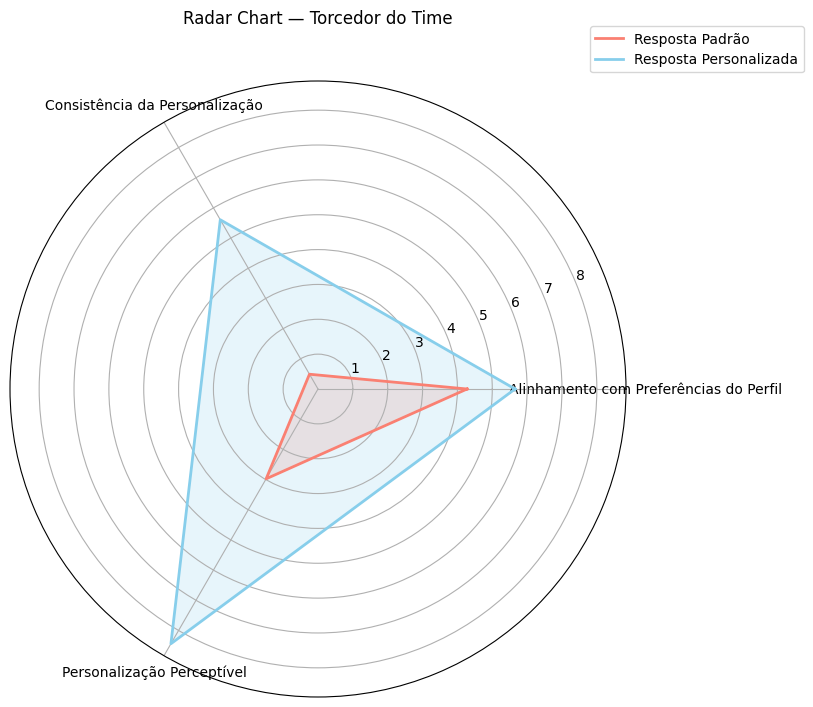

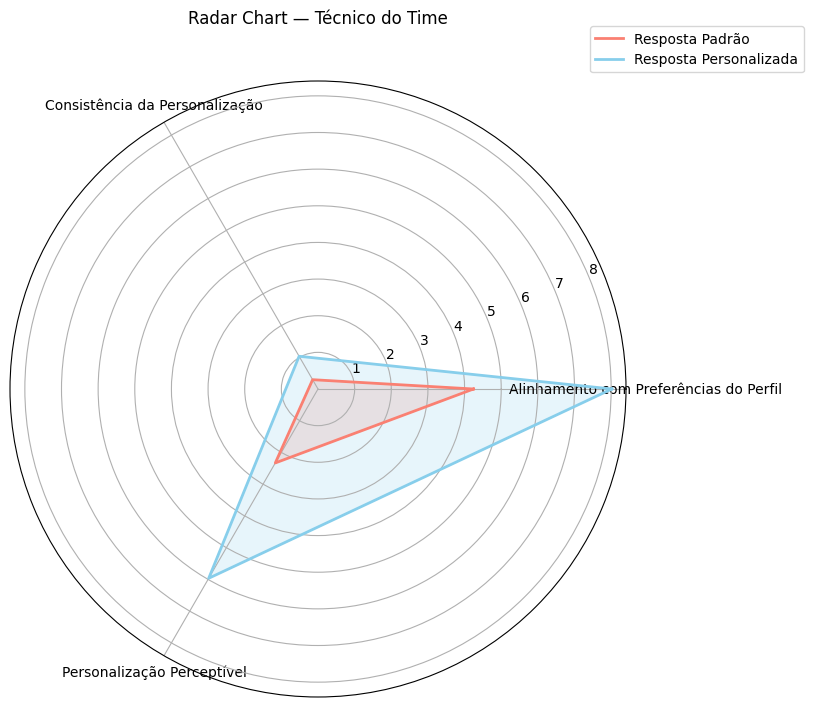

IndexError: list index out of range

In [96]:
def plot_radar_chart_por_perfil(df, perfil):
    # Filtra pelo perfil desejado
    df_perfil = df[df["perfil"] == perfil]

    # Calcula a média por critério
    agg = df_perfil.groupby("criterio")[["score_padrao", "score_personalizada"]].mean().reset_index()

    # Preparar categorias e valores
    categorias = agg["criterio"].tolist()
    valores_padrao = agg["score_padrao"].tolist()
    valores_personalizada = agg["score_personalizada"].tolist()

    # Ângulos (sem duplicar categoria aqui ainda)
    num_vars = len(categorias)
    angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
    angles += [angles[0]]  # Fechar o círculo

    # Adicionar o primeiro valor ao final para fechar o radar
    valores_padrao += [valores_padrao[0]]
    valores_personalizada += [valores_personalizada[0]]

    # Criar figura
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    # Plotar
    ax.plot(angles, valores_padrao, label="Resposta Padrão", linewidth=2, color="salmon")
    ax.fill(angles, valores_padrao, alpha=0.2, color="salmon")

    ax.plot(angles, valores_personalizada, label="Resposta Personalizada", linewidth=2, color="skyblue")
    ax.fill(angles, valores_personalizada, alpha=0.2, color="skyblue")

    # Labels
    ax.set_xticks(angles[:-1])  # Retira o último (duplicado)
    ax.set_xticklabels(categorias, fontsize=10)

    ax.set_title(f"Radar Chart — {perfil}", y=1.08)
    ax.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1))

    plt.show()
    
# Exemplo de uso:
plot_radar_chart_por_perfil(df, perfil="Torcedor do Time")
plot_radar_chart_por_perfil(df, perfil="Técnico do Time")
plot_radar_chart_por_perfil(df, perfil="Narrador do Jogo")

In [27]:
vitorias = df[df["score_personalizada"] > df["score_padrao"]]
taxa = len(vitorias) / len(df)
print(f"A resposta personalizada venceu em {taxa:.0%} dos casos.")

A resposta personalizada venceu em 90% dos casos.


# Análise qualitativa com exemplos selecionados

**Perfil:** Torcedor  
**Pergunta:** Bruno Pacheco foi bem no jogo contra o Ceará no dia 1º de abril de 2023 ou deixou a desejar?

🔸 **Resposta padrão:**  
> Bruno Pacheco teve uma média de velocidade de 1.36 m/s, uma média de aceleração de -0.0077 m/s² e realizou 0.36 sprints. Esses números indicam um desempenho abaixo do esperado, sugerindo que ele deixou a desejar no jogo contra o Ceará.

🔹 **Resposta personalizada:**  
> Bruno Pacheco teve um desempenho que pode ser considerado abaixo do esperado no jogo contra o Ceará em 1º de abril de 2023. Ele apresentou uma média de velocidade de 1.36 m/s, o que indica uma movimentação limitada em campo. Além disso, sua média de aceleração foi de -0.0077 m/s², sugerindo dificuldades em ganhar velocidade rapidamente. O número de sprints, que foi de apenas 0.36, também reforça a ideia de que ele não conseguiu se destacar na partida. Como torcedor, é compreensível que você esperasse mais dele, e esses dados mostram que ele deixou a desejar nesse confronto.

🎯 **Análise:** A resposta personalizada utiliza tom empático, vocabulário voltado ao torcedor e interpreta os dados de forma mais acessível.

# Exemplos dos critérios

Pergunta:

“Quem foi que mais correu contra o Ceará naquele jogo de primeiro de abril?”

Perfil:

Torcedor do Time

⸻

🔹 Critério 1 – Personalização Perceptível

❌ Nota baixa (ex: 1):

“No jogo contra o Ceará em 1º de abril, Tomas Pochettino percorreu a maior distância total entre todos os jogadores em campo.”

Justificativa:
	•	Linguagem neutra, técnica e direta.
	•	Nenhuma diferença em relação ao que seria esperado para qualquer outro perfil.
	•	Poderia ser uma resposta “padrão”, sem sinais de adaptação.

⸻

✅ Nota alta (ex: 10):

“Rapaz, no jogo contra o Ceará no primeiro de abril, o Pochettino correu igual doido! Foi o cara que mais se movimentou em campo — parecia que tinha uns três dele! É esse tipo de entrega que faz a gente vibrar!”

Justificativa:
	•	Uso de expressões típicas do torcedor (“rapaz”, “igual doido”, “faz a gente vibrar”).
	•	Tom claramente informal e empolgado.
	•	Adaptação explícita e perceptível, com diferenças visíveis em relação à versão padrão.

⸻

🔹 Critério 2 – Alinhamento com Preferências do Perfil

❌ Nota baixa (ex: 2):

“O jogador com maior distância percorrida foi Lucas Crispim, com 3.7 km. Esse valor foi coletado via GPS e representa a soma total dos deslocamentos em campo.”

Justificativa:
	•	Linguagem excessivamente técnica.
	•	Informações (ex: “coletado via GPS”, “soma total dos deslocamentos”) irrelevantes para um torcedor.
	•	Não respeita o desejo do torcedor por uma narrativa emocional, sem muitos números ou jargões técnicos.

⸻

✅ Nota alta (ex: 10):

“Foi o Lucas Crispim, meu amigo! O cara não parou um minuto. Correu pra lá e pra cá o jogo todo — parecia que tava em todos os cantos do campo! Mostrou raça demais!”

Justificativa:
	•	Elimina números técnicos e apresenta os dados com expressividade.
	•	Escolhe o que é relevante para o torcedor (dedicação e raça).
	•	Ajusta o foco e o tom de acordo com a preferência emocional do perfil.

⸻

🔹 Critério 3 – Consistência da Personalização ao Longo do Texto

❌ Nota baixa (ex: 1):

“O atleta que apresentou a maior quilometragem percorrida foi Pochettino. Ele demonstrou boa disposição física. Esse desempenho é compatível com a carga de treino da semana.”

Justificativa:
	•	Começa técnica e termina técnica.
	•	Nenhuma personalização aplicada, e mesmo que fosse o início informal e o final técnico (ou vice-versa) geraria inconsistência.
	•	Não há esforço de manter o estilo adaptado ao perfil.

⸻

✅ Nota alta (ex: 10):

“Galera, quem correu mais naquele jogo foi o Pochettino! Desde o apito inicial ele tava voando — parecia um trator incansável em campo! Não deu descanso pro adversário. Jogo assim enche nosso coração de orgulho!”

Justificativa:
	•	Tom empolgado e linguagem informal mantidos do início ao fim.
	•	Narrativa envolvente e coerente com o perfil de torcedor.
	•	A personalização não está restrita a uma frase isolada, mas sustenta toda a resposta.